# Ensembel Technique : Random Forest

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [2]:
import pandas as pd
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

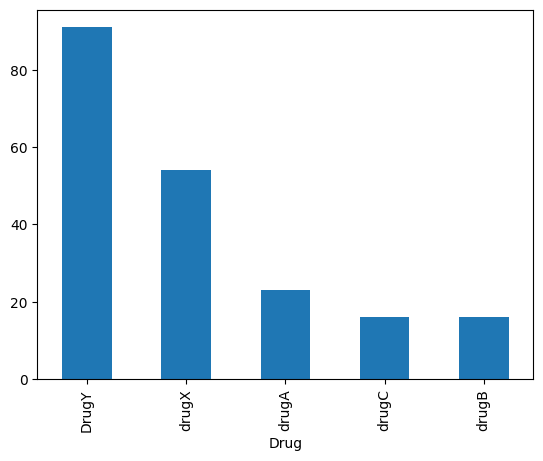

In [6]:
df['Drug'].value_counts().plot(kind='bar')

## Check missing values in dataframe

In [7]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Seperate X and Y

In [8]:
X=df.drop(labels=['Drug'],axis=1)
Y=df[['Drug']]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


### Apply Label Encoding to the Y values

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y['Drug']=le.fit_transform(Y['Drug'])

In [12]:
Y.head()

,Drug
0,0
1,3
2,3
3,4
4,0


In [13]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

### Preprocessing on X feature

In [14]:
cat=list(X.columns[X.dtypes==object])
con=list(X.columns[X.dtypes!=object])

In [15]:
cat

['Sex', 'BP', 'Cholesterol']

In [16]:
con

['Age', 'Na_to_K']

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])


                  

In [19]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [20]:
cols=pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [21]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.3,random_state=67)

In [23]:
xtrain.shape

(140, 9)

In [24]:
xtest.shape

(60, 9)

In [25]:
ytrain.value_counts()

Drug
0       62
4       36
1       21
2       11
3       10
Name: count, dtype: int64

In [26]:
ytest.value_counts()

Drug
0       29
4       18
3        6
2        5
1        2
Name: count, dtype: int64

## Build the model

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=21)
model.fit(xtrain,ytrain)


RandomForestClassifier(random_state=21)

In [28]:
# Training accuracy
model.score(xtrain,ytrain)

1.0

In [29]:
# Testing accuracy
model.score(xtest,ytest)

0.9833333333333333

## Hyperparameter tuning

In [30]:
params = {'n_estimators':[10,50,100,200],
          'max_depth':[2,3,4,5,6,7,8],
          'min_samples_split':[4,5,6,7,8],
          'criterion':['gini','entropy']}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier(random_state=21)
gscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [4, 5, 6, 7, 8],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [ ]:
gscv.best_params_